## Wavelet Filtering

One interesting feature of the Wavelet Transform is the possibility to use it as a bandpass filter. There are lots of methods to filter out noise from time series, but the Wavelet Filtering method is a useful (indeed very useful) one as well.

The whole method is briefly described at TC98 section 6 named "Extensions to Wavelet Analysis". 

Let's see how we can get it done now

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import math
import matplotlib

from waveletFunctions    import*

In [5]:
n    =  len(sst)
dt   =  (1/4)
time =  (np.arange(n))*dt + 1871.0   # construct time array
xlim =  ([1871, 2000])               # plotting range
pad  =  1.                           # pad the time series with zeroes (recommended)
dj   =  0.25                         # this will do 4 sub-octaves per octave
s0   =  2 * dt                       # this says start at a scale of 6 months
j1   =  7 / dj                       # this says do 7 powers-of-two with dj sub-octaves each
mother = 'MORLET'                    # options: 'MORLET', 'PAUL' e 'DOG'

In [6]:
##--- Wavelet Transform:
wave, period, scale, coi  = wavelet(sst, dt, pad, dj, s0, j1, mother)
realpart  =  np.real(wave)

In [7]:
##--- filtering
cdelta    =  0.776                              # cdelta=0.776 for morlet wavelet; see table 2 (TC, 1998)
psi       =  math.pi**(-1/4)                    # for morlet wavelet; see table 2 (TC, 1998)
xnc       =  (dj*math.sqrt(dt))/(cdelta*psi)    # 'constant' part for Eq. 29 (TC, 1998)
avg       =  np.logical_and(scale>=2.,scale<8.) # filtering scales
scale_avg =  scale[:, np.newaxis].dot(np.ones(n)[np.newaxis, :]) # expand scale array
xnv       =  realpart/np.sqrt(scale_avg)        # 'variable' part for Eq. 29
xn        =  xnc*sum(xnv[avg,:])                # Eq. 29

This is really a no-brainer. The only thing you have to do is to apply the Eq. 29 from TC98 and be careful to use the correct parameters for the Morlet Wavelet (you can use the other 'mothers' as well). 

As you can see above, we will make the filtering over the scales from 2 to 8 years but you can select any range you might want as well. 

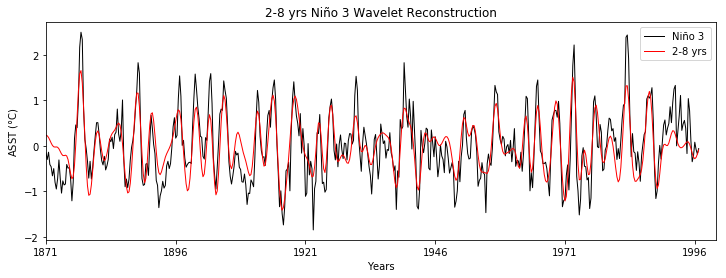

In [8]:
plt.figure(figsize=(12,4))
plt.xlim([1871,2000])
plt.xticks(range(1871, 2005, 25))
plt.plot(time, sst,'black',lw=1,label=u"Niño 3")
plt.plot(time,xn,'red',lw=1,label="2-8 yrs")
plt.xlabel('Years')
plt.ylabel(u'ASST ($\degree$C)')
plt.title(u'2-8 yrs Niño 3 Wavelet Reconstruction')
plt.legend(loc='upper right')

plt.tight_layout
plt.show()

It's simple as that. If you don't believe me, let's select another range for our filtering. 

10-20 years looks good enough. Let's do it.

In [9]:
##--- filtering
cdelta    =  0.776                              # cdelta=0.776 for morlet wavelet; see table 2 (TC, 1998)
psi       =  math.pi**(-1/4)                    # for morlet wavelet; see table 2 (TC, 1998)
xnc       =  (dj*math.sqrt(dt))/(cdelta*psi)    # 'constant' part for Eq. 29 (TC, 1998)
avg       =  np.logical_and(scale>=10.,scale<20.) # filtering scales
scale_avg =  scale[:, np.newaxis].dot(np.ones(n)[np.newaxis, :]) # expand scale array
xnv       =  realpart/np.sqrt(scale_avg)        # 'variable' part for Eq. 29
xn        =  xnc*sum(xnv[avg,:])                # Eq. 29

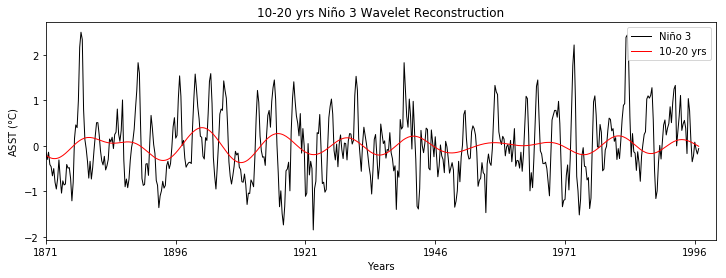

In [12]:
plt.figure(figsize=(12,4))
plt.xlim([1871,2000])
plt.xticks(range(1871, 2005, 25))
plt.plot(time, sst,'black',lw=1,label=u"Niño 3")
plt.plot(time,xn,'red',lw=1,label="10-20 yrs")
plt.xlabel('Years')
plt.ylabel(u'ASST ($\degree$C)')
plt.title(u'10-20 yrs Niño 3 Wavelet Reconstruction')
plt.legend(loc='upper right')

plt.tight_layout
plt.show()

You can see now we have a new low-frequency time series from our original Niño 3 data. It's truly a piece of cake to do this kind of stuff now, isn't it?

As we are tired to know by now, no method is perfect and the wavelet analysis also has its own set of troubles which can turn it's applicability to climate science a little bit problematic$^{2}$. However, it's usefulness has also been demonstraded many times and we might get a little tired to review them all.

## REFERENCES

1 - Torrence, Christopher, and Gilbert P. Compo. "A practical guide to wavelet analysis." Bulletin of the American Meteorological society 79.1 (1998): 61-78.

2 - Huang, Norden E., and Zhaohua Wu. "A review on Hilbert‐Huang transform: Method and its applications to geophysical studies." Reviews of geophysics 46.2 (2008).

## RECOMMENDED READINGS

1 - Grinsted, Aslak, John C. Moore, and Svetlana Jevrejeva. "Application of the cross wavelet transform and wavelet coherence to geophysical time series." Nonlinear processes in geophysics 11.5/6 (2004): 561-566.

2 - Daubechies, Ingrid. Ten lectures on wavelets. Society for industrial and applied mathematics, 1992.

3 - Kumar, Praveen, and Efi Foufoula‐Georgiou. "Wavelet analysis for geophysical applications." Reviews of geophysics 35.4 (1997): 385-412.

4 - Labat, David, et al. "Wavelet analysis of Amazon hydrological regime variability." Geophysical Research Letters 31.2 (2004).